In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.facecolor'] = 'white'

# Computer Assignment 2

## Student names and student numbers:
- Theo Koenig (4922301)
- Tip ten Brink (4927192)
- Lucas van Elderen (4960637)

**General TA feedback:**

## === Section 1 : The Saha Equation ===

In [18]:
from IPython.display import display, Math, Latex

### Exercise 1

**Grade: x/8**

**TA Feedback:**

$$\require{mhchem}$$
We know that at equilibrium:
$0 = dG = \sum_i{\mu_idN_i}$

Therefore we find that for an equilibrium equation of a single hydrogen atom to a single electron and proton, the chemical potentials, $\mu_{i}$, must be balanced as such:
$\mu_{H} = \mu_{e^-}+\mu_{p}$

Then, using the chemical potential of an ideal gas mixture we find
\begin{equation}
-k_B T  \ln{\left( \frac{1}{n_H} \left( \frac{2\pi m_H k_B T}{h^2} \right) ^{3/2}\right)} - I = -k_{B}T  \ln{\left(\frac{1}{n_e} \left( \frac{2\pi m_e k_B T}{h^2} \right) ^{3/2} \right)} -k_{B}T \ln{\left(\frac{1}{n_p} \left( \frac{2\pi m_p k_B T}{h^2} \right) ^{3/2} \right)}.
\end{equation}

This can be simplified to:
\begin{equation}
\ln \left( {\frac{1}{n_H} \left( \frac{2 \pi m_H k_B T}{h^2} \right) ^{3/2} n_e \left( \frac{2 \pi m_e k_B T}{h^2} \right) ^{-3/2} n_p  \left( \frac{2 \pi m_p k_B T}{h^2} \right) ^{-3/2}} \right) = -\frac{I}{k_B T}
\end{equation}

Taking $m_H = m_p$ and given $\frac{n_e n_p}{n_H} = \frac{n_e^2}{n_H}$, we then find
\begin{equation}
\ln{\frac{n_e^2}{n_H} \left( \frac{h^2}{2 \pi m_e k_B T} \right) ^{3/2}} = -\frac{I}{k_B T}.
\end{equation}

From which it follows

\begin{equation}
\frac{n_e^2}{n_H} = \left( \frac{2 \pi m_e k_B T}{h^2} \right)^{3/2} \cdot e^{\frac{-I}{k_B T}}.
\end{equation}

Given that $\gamma = \frac{\hbar^2}{2m_e} = 13.6 eV$, we then finally obtain

\begin{equation}
\frac{n_e^2}{n_H} = \left( \frac{k_B T}{4 \pi \gamma} \right)^{3/2} \cdot e^{\frac{-I}{k_B T}}.
\end{equation}


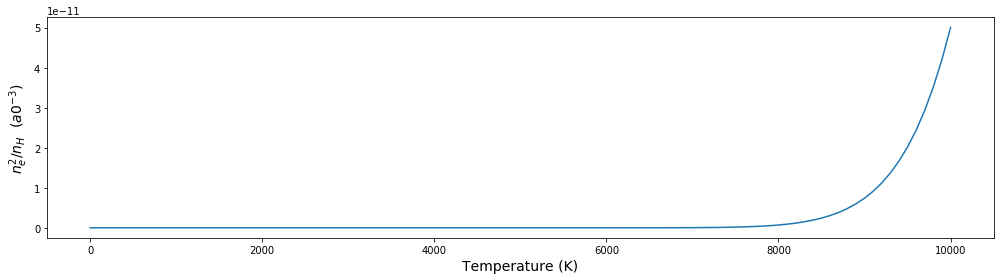

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Constants used
pi = np.pi
a0 = 0.529e-10 # m
hbar2_d_2me = 13.6 # eV a0^2
gamma = hbar2_d_2me
k_B = 8.617e-5 # eV K^-1 Boltzmann constant
I = 13.6 # eV ionization potential of the hydrogen atom

T_start = 0 # start at zero results in a divide_by_zero_error
T_end = 10000
T_step = 100
T = np.arange(T_start, T_end+T_step, T_step)
T[0] = 1

def saha(T):
    return ((k_B*T)/(4*pi*gamma))**1.5 * np.exp(-I/(k_B*T))

ne2_d_nH = saha(T)

fig, ax = plt.subplots(figsize=(14,4))
ax.plot(T, ne2_d_nH)
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel(r'$n_e^2/n_H$ '+' $(a0^{-3})$', fontsize=14) #Missing units
fig.tight_layout()

$a_0$ is equivalent to the Bohr radius. It makes sense to show the density in terms of $a_0^{-3}$ as this it is more appropriately scaled to atomic sizes.

### Exercise 2

**Grade: x/9**

**TA Feedback:**

The derivation of 

\begin{equation}
\frac{\zeta^2}{1-\zeta}  = f(T)
\end{equation}

is shown as follows:

Given the ionization fractions as

\begin{equation}
\zeta = \frac{n_p}{n_p + n_H},
\end{equation}


with 

\begin{equation}
f(T) = \frac{1}{n_0}\left( \frac{2 \pi m_e k_B T}{h^2} \right)^{3/2} \cdot e^{\frac{-I}{k_B T}} = \frac{1}{n_0}\frac{n_e^2}{n_H},
\end{equation}

where $n_0 = n_p + n_H$, it follows that:

\begin{equation}
\frac{\zeta^2}{1-\zeta}  = \left( \frac{n_p}{n_p + n_H} \right)^2 \left( \frac{1}{1 - \frac{n_p}{n_p + n_H}} \right) = \frac{n_p^2}{(n_p + n_H)^2 - (n_p + n_H)n_p} = \frac{n_p^2}{n_H(n_p + n_H)} = \frac{1}{n_0}\frac{n_p^2}{n_H} = \frac{1}{n_0}\frac{n_e^2}{n_H} = f(T)
\end{equation}

$\zeta(T)$ can then be found by simply rearranging the above into a quadratic equation

\begin{equation}
\zeta(T)^2 + \zeta(T) f(T) - f(T) = 0.
\end{equation}

Which leads to our final equation for $\zeta(T)$

\begin{equation}
\zeta(T) = \frac{-f(T)+\sqrt{f(T)^2 + 4f(T)}}{2},
\end{equation}

and this is plotted below.

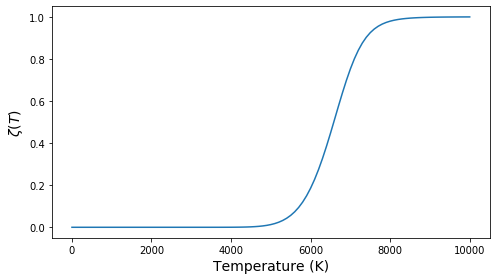

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# constants
a0 =0.529e-10 #m
n0 = 1e17*a0**3 #a0

f = saha(T)/n0

zeta = (-f + np.sqrt(f ** 2 + 4 * f)) / 2

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(T, zeta)
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel('$\zeta(T)$', fontsize=14) #No units
fig.tight_layout()

### Exercise 3

**Grade: x/4**

**TA Feedback:**

The temperature at which $\zeta < 0.01$ is first crossed indicates the temperature where the vast majority of protons had formed hydrogen atoms. This has been found below through simply iterating through the values of $\zeta(T)$ until the threshold was first met.

The decoupling temperature at which ζ < 0.01 is: 4900 K


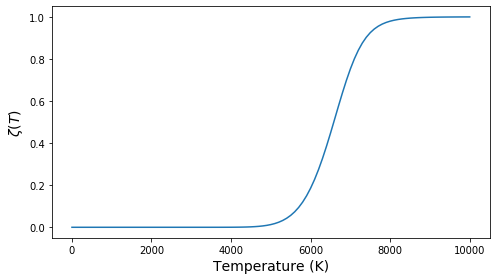

In [21]:
import matplotlib.pyplot as plt


Temperature = 0
for i in range(0,len(T)):
    if zeta[len(T)-1-i] <= 0.01:
        Temperature += 10000-i*100
        break

print("The decoupling temperature at which ζ < 0.01 is: " +str(Temperature)+" K")
        
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(T, zeta)
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel(r'$\zeta(T)$', fontsize=14) #No units
fig.tight_layout()

The decoupling temperature was found to be $T = 4900 K$.

### Exercise 4

**Grade: x/8**

**TA Feedback:**

In a two-state system of ground state and ionized state of hydrogen we find that at chemical equilibrium their respective chemical potentials $\mu_1 = \mu_2 = \mu$ must be equal. By using the given equation for $\mu_H = \mu_2$ and $\mu_H + I = \mu_1$ (with $I = 13.6 eV$), and then solving for $n_1$ and $n_2$, we obtain: 

\begin{equation}
n_1 = \left( \frac{2 \pi m_H k_B T}{h^2} \right)^{3/2} e^{\frac{\mu}{k_B T}}
\end{equation}

and 

\begin{equation}
n_2 = \left( \frac{2 \pi m_H k_B T}{h^2} \right)^{3/2} e^{\frac{\mu + I}{k_B T}}.
\end{equation}

Then the ionization fraction can simply be found as:

\begin{equation}
\zeta(T) = \frac{n_1}{n_1 + n_2} = \frac{1}{1+e^{\frac{I}{k_B T}}}.
\end{equation}

C:\Users\tip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


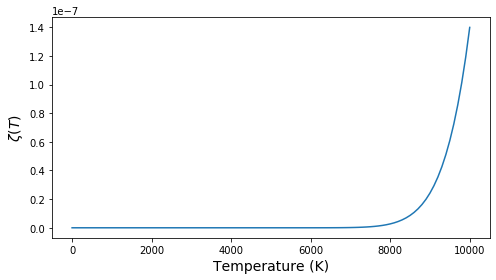

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# constants
I = 13.6 # eV
k_B = 8.617e-5 #eV K^-1

zeta_2 = 1 / (1 + np.exp(I / (k_B * T)))

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(T, zeta_2)
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel('$\zeta(T)$', fontsize=14) #No units
fig.tight_layout()

By filling the temperature $T = 4900 K$ into the found equation, we find the ionization fraction to be $\zeta(4900) = 1.027 \times 10^{-14}$. The discrepancy between the ionization fraction of the two-state hydrogen system versus the original system can be explained due to the fact that the two state system needs much higher temperatures to be ionized. At a higher temperature, the electrons have a higher energy and more are ionized.

## === Section 2 : Car Battery ===

### Exercise 5

**Grade: x/6**

**TA Feedback:**

To obtain the change of entropy we can use the Maxwell relation and the relation between the standard potential
and the chemical potential of electrons:

$$\left( \frac{{\partial}\mu}{{\partial}T} \right)_{N_{e}} = \left( \frac{{\partial}S}{{\partial}N_{e}} \right)_{T}$$

$$E_{s} = \frac{{\Delta}\mu_{e}}{e}$$

Combining these relations gives us the next equation:

$$\left( \frac{e{\partial}E_{s}}{{\partial}T} \right)_{N_{e}} = 0.022e = \frac{{\Delta}S}{{\Delta}N_{e}}$$

So the change of entropy is given by the following:

$${\Delta}S = 0.022e{\Delta}N_{e}$$

Here is $N_{e}$ equal to the amount of consumed electrons. Because the amount of used electrons per reaction is
the same as the amount of used lead, the change of entropy per mole of lead is given by the following equation:

$${\Delta}S = 0.022e{\Delta}N_{A}$$

### Exercise 6

**Grade: x/8**

**TA Feedback:**

The equilibrium condition of the nitrogen fixation gives us:

$$k = e^{-{\Delta}{\mu}^{0}/(k{_{B}T)}}$$

Here k is the ratio of concentrations of solvents over reactants. In the case of the battery the reactants
we need to consider are only 2H$_{3}$O$^{+}$ and 2HSO$_{4}$$^{-}$ and the only solvent we need to consider is 4
H$_{2}$O because all the other solvents of reactants are solid and therefore their chemical potential is fixed.
Assuming that the water concentration is constant this gives us the following equation:

$$k = \frac{(1 mol/l)^4}{(n_{H_{3}O^{+}})^2(n_{HSO_{4}^{-}})^2}$$

Taking the logarithm of both sides and replacing $-{\Delta}{\mu}$ by the difference of the chemical potential
of the reaction finally gives us an expression we are looking for:

$$\log(k) = \frac{(E_{s}^{(0)}-E_{s})ev_{e}}{k_{B}T}$$

And writing this back to an expression for $E_{s}$ gives us equation 1 of the assignment.

### Exercise 7

**Grade: x/8**

**TA Feedback:**

An expression for E$_{s}$ at 300 degrees Kelvin can be derived from the last equation above.

$$E_{s} = E_{s}^{(0)} - \frac{k_{B}T}{ev_{e}}\log(k)$$

The dependence is logarithmic because the concentration of H$_{3}O^{+}$ is inside the logarithm.

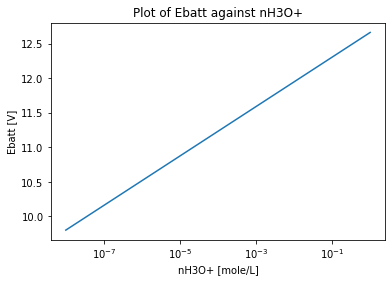

In [23]:
import matplotlib.pyplot as plt
import numpy as np

E0 = 2.11
kb = 1.3806*10**(-23)
T = 300
e = 1.602*10**(-19)

def EB(nH):
    k = 1/(nH**2)
    Es = E0 -((kb*T)/(2*e))*np.log(k)
    Eb = 6*Es
    return Eb

nH3 = np.logspace(-8,0)

plt.title('Plot of Ebatt against nH3O+')
plt.xlabel('nH3O+ [mole/L]')
plt.ylabel('Ebatt [V]')
plt.semilogx(nH3, EB(nH3))
plt.show()

### Exercise 8

**Grade: x/8**

**TA Feedback:**

Because we start with one mol of the reactants and per mol of the reactants one mol of electrons is transferred,
the concentrations of HSO$_{4}^{-}$ and H$_{3}$O$^{+}$ are equal to 1 - n$_{e}$ mol/L. Here n$_{e}$ is given in mol.

For the E$_{batt}$-n$_{e}$ plot we will use equation the previous equation above, but with slightly different values.
Here is T 300 K, E$_{s}^{(0)}$ is 2.11 V, v$_{e}$ is 2, HSO$_{4}^{-}$ and H$_{3}$O$^{+}$ are 1 - n$_{e}$.
The battery needs to be recharged when the battery voltage is below 10 V. This is the case when 0.99981 mol
of electrons have been transferred.

C:\Users\tip\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


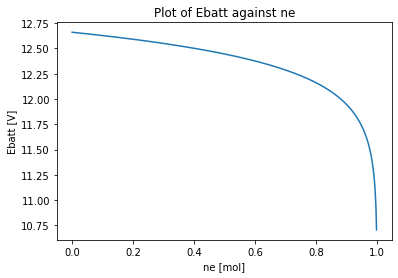

In [24]:
import matplotlib.pyplot as plt
import numpy as np

E0 = 2.11
kb = 1.3806*10**(-23)
T = 300
e = 1.602*10**(-19)

def EB(ne):
    k = 1/((1-ne)**4)
    Es = E0 -((kb*T)/(2*e))*np.log(k)
    Eb = 6*Es
    return Eb

ne = np.logspace(-8,0, num = 1000000)

plt.title('Plot of Ebatt against ne')
plt.xlabel('ne [mol]')
plt.ylabel('Ebatt [V]')
plt.plot(ne, EB(ne))
plt.show()

### Exercise 8

**Grade: x/8**

**TA Feedback:**

To determine when the potential is 0 when the concentrations of HSO$_{4}^{-}$ and H$_{3}$O$^{+}$ are equal
we'll take k = $\frac{1}{n^4}$ and E$_{s}$ = 0. This gives us:

$$E_{s}^{(0)} - \frac{k_{B}T}{ev_{e}}\log\left( \frac{1}{n^4} \right) = 0$$

Working out this equation gives n = 1.9 $\cdot$$10^{-18}$ moles per liter.

## === Section 3 : Monte Carlo simulation ===

### Exercise 10

**Grade: x/5**

**TA Feedback:**

We know
$$\mathcal{P}(s) = \frac{1}{Z}e^{E(s)/kT}$$ and
$$Z = \sum_s{e^{E(s)/kT}}$$

We measure the energies $E_1$ for state $s_1$ and $E_2$ for state $s_2$
in units of $kT$. So we have
$$Z = e^{-E_1} + e^{-E_2}$$

This gives us for the probabilities:

$$p_1 = \mathcal{P}(s_1) = \frac{e^{-E_1}}{e^{-E_1} + e^{-E_2}}$$
$$p_2 = \mathcal{P}(s_2) = \frac{e^{-E_2}}{e^{-E_1} + e^{-E_2}}$$

### Exercise 11

**Grade: x/8**

**TA Feedback:**

The flow from state 1 to 2 in a time step $T$ is given by the probability of being in state 1, $p_1$,
times the "hopping" probability $T_{1,2}$ of going to state 2 in a time step if a particle is in state 1.
The flow from state 2 to 1 is similar, so $p_2 T_{2,1}$.

For the case $p_1 < p_2$, we choose $T_{1,2} = 1$ and $T_{2,1} = p_1 / p_2$, so we then have as a net flow from 1 to 2:

$$p_1 T_{1,2} - p_2 T_{2,1} = p_1 - p_2 \frac{p_1}{p_2} = 0$$

For the case $p_2 \leq p_1$, we choose $T_{1,2} = p_2 / p_1$ and $T_{2,1} = 1$, so:

$$p_1 T_{1,2} - p_2 T_{2,1} = p_1 \frac{p_2}{p_1} - p_2 = 0$$

So we see that if the states are occupied with probabilities $p_1$, $p_2$, there is no
net flow under our choice of hopping probabilities.

### Exercise 12

In [25]:
**Grade: x/3**

**TA Feedback:**

SyntaxError: invalid syntax (<ipython-input-25-f53553a4b675>, line 1)

We plot the following function from $x$ = 3 to -3:

$$V(x) = x^2 + 2e^{-4(x-0.5)^2} + 2.5e^{-4(x+0.5)^2}$$

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3,3,100)

Vx = x**2 + 2*np.exp(-4*((x-0.5)**2)) + 2.5*np.exp(-4*((x+0.5)**2))

plt.plot(x, Vx)
plt.title("Potential function")
plt.ylabel("V")
plt.xlabel("x")
plt.grid()
plt.show()

### Exercise 13

**Grade: x/19**

**TA Feedback:**

We randomly distribute 20,000 walkers over the interval -3 to 3. We know that if the walkers are distributed according
to their occupational probabilities, there will be no further net flow if we choose the hopping probabilities similar
to before.

This means that a walker in a certain state $x$ must have a probability to go to a state $x$ + $\Delta x$, where
$\Delta x$ is a random small displacement, in our case uniformly distributed between $W$ and $-W$ with $W$ = 0.1.
This probability, like in the situation with just two states, is equal to $p_x$ / $p_{\Delta x}$. If it is greater
than 1, the walker is guaranteed to go to this new state, otherwise it goes to this new state with the probability
equal to this ratio. This is achieved by comparing the ratio to a random number uniformly between 0 and 1,
if it is greater than 1, it will always be higher than this random number so it will be guaranteed to go.

The probabilities to be in a certain $x$ are calculated using the Boltzmann factor.

Now, we let the walkers walk many steps until they are roughly distributed like the actual occupational
probabilities associated with the potential function $V(x)$, which is the same as in the previous exercise.

The histogram of of the distribution is normalized and compared with a normalized plot of the Boltzmann factor of
the potential function. This shows that the plots align.

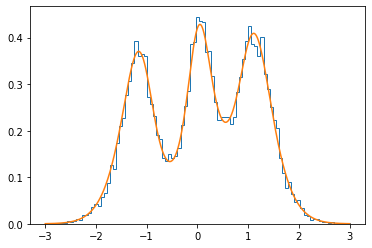

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# function that calculates the Boltzmann factor
def px(x, beta=1):
    Vx = x**2 + 2*np.exp(-4*((x-0.5)**2)) + 2.5*np.exp(-4*((x+0.5)**2))
    return np.exp(-beta*Vx)

walk_num = 20000
walkers = (np.random.random_sample(walk_num) * 6) - 3
t_range = range(10000)
# calculate first Boltzmann factors walkers
px_walkers = px(walkers)

# time loop
for t in t_range:
    W = 0.1
    # displacement is random uniformly between -W and W
    displacement = (np.random.random_sample(walk_num) * (W * 2)) - W
    displaced_walkers = walkers + displacement
    # Boltzmann factor displaced walkers is calculated and the ratio
    px_displaced_walkers = px(displaced_walkers)
    p_ratio = px_displaced_walkers / px_walkers
    # uniform probabilities between 0 and 1 for all walkers for comparison
    prob_less_than_1 = np.random.random_sample(walk_num)
    # walkers are displaced with probability equal to p_ratio
    walkers_to_displace = p_ratio > prob_less_than_1
    # for the next step the displaced walker Boltzmann factor can be reused
    px_walkers = np.where(walkers_to_displace, px_displaced_walkers, px_walkers)

    walkers = np.where(walkers_to_displace, displaced_walkers, walkers)

bins = np.linspace(-3, 3, 100)
plt.hist(walkers, bins=bins, density=True, histtype='step')

# to normalize probability we calculate the area under the curve in a very simple manner
# this area must be equal to 1 to have it properly normalized
start = -3
stop = 3
steps = 1000
analytic_xs = np.linspace(start, stop, steps)
dx = (stop - start) / steps
area = 0
for x in analytic_xs:
    area += dx * px(x)

plt.plot(analytic_xs, px(analytic_xs)/area)

plt.show()